Import Library

In [95]:
from google.colab import files

# Library u/ machine learning Tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Library u/  upload file gcolabs dan plot
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Install Kaggle

In [54]:
!pip install -q Kaggle

Settingan untuk bisa upload data dari kaggle

In [55]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [56]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [57]:
!kaggle datasets download -d drgfreeman/rockpaperscissors

rockpaperscissors.zip: Skipping, found more recently modified local copy (use --force to force download)


In [58]:
! unzip rockpaperscissors

Archive:  rockpaperscissors.zip
replace README_rpc-cv-images.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: README_rpc-cv-images.txt  
  inflating: paper/04l5I8TqdzF9WDMJ.png  
  inflating: paper/0Og76sl5CJhbxWWx.png  
  inflating: paper/0RA9rcrv8iVvuDDU.png  
  inflating: paper/0Uomd0HvOB33m47I.png  
  inflating: paper/0a3UtNzl5Ll3sq8K.png  
  inflating: paper/0cb6cVL8pkfi4wF6.png  
  inflating: paper/0eqArS2GgsBeqgSn.png  
  inflating: paper/0t08v9bAaA0mXGCQ.png  
  inflating: paper/0vugygEjxQJPr9yz.png  
  inflating: paper/0zKU6wEhT2cDe9j0.png  
  inflating: paper/14K62H4KG1hg5qiJ.png  
  inflating: paper/1Dfw5FRlS4h60JPX.png  
  inflating: paper/1Frbe8cdOdkciOBg.png  
  inflating: paper/1Tt9U9SzrOm98Xtw.png  
  inflating: paper/1fKclJk4eBWOQSR1.png  
  inflating: paper/1jHtb93pI8f6pfKo.png  
  inflating: paper/1oKnUgV2CdCaQUUX.png  
  inflating: paper/1uoW7QcH2qAgCTxv.png  
  inflating: paper/1yKjzquSvl9ShK7K.png  
  inflating: paper/1yeoLbmp4alVOtFv.png  
  inflating: p

Lokasi Dataset RockPaperScissors

In [59]:
base_dir = '/content/rps-cv-images/'

roc_dir = os.path.join(base_dir,'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')


Hitung Jumlah Data pada Dataset RockPaperScissors

In [60]:
total_rock = len(os.listdir(roc_dir))
total_paper = len(os.listdir(pap_dir))
total_scissors = len(os.listdir(sci_dir))

# Mencetak jumlah data rock paper scissor
print("Total Data Paper Image      : ",total_paper)
print("Total Data Rock Image       : ",total_rock)
print("Total Data Scissors Image  : ",total_scissors)

total_image = len(list(glob.iglob("/content/rps-cv-images/*/*.*", recursive=True)))
print("Total Data Dalam Folder   : ",total_image)

Total Data Paper Image      :  712
Total Data Rock Image       :  726
Total Data Scissors Image  :  750
Total Data Dalam Folder   :  2188


Cek Isi Folder

In [61]:
import os
os.listdir('/content/rps-cv-images')

['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt']

Train dan Validation  data generator 

In [62]:
Train_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = 0.2
)

Validation_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = 0.2
)
     

Train dan Validation Split Dataset Dengan Validasi 20%

In [63]:
Train_generator = Train_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = True,
    subset = "training"
)

Validation_generator = Validation_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = False,
    subset = "validation"
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


Model Menggunakan Sequential + Conv2D + Dropout

In [100]:
Model = Sequential(
    [
     # Activation menggunakan relu + softmax
     Conv2D(32, (3,3), strides = (1,1), activation = 'relu' , input_shape = (150,150,3)),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(64, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(128, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Flatten(),
     
     # Droupout
     Dropout(0.2),
     Dense(128, activation = 'relu'),
     Dense(3, activation='softmax')
    ]
)

Menggunakan Optimizer Adam

In [65]:
Adam(learning_rate=0.00146, name='Adam')
Model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

Model Menggunakan Callback

In [66]:
class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('accuracy') > 0.80):
			print("\nReached %2.2f%% accuracy, so stopping training!!" %(0.80*100))
			self.model.stop_training = True

# Instantiate a callback object     
callbacks = myCallback()

Model Menggunakan Scheduler

In [67]:
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)

Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

Training Dataset Fit

In [68]:
batch_size = 16
with tf.device("/device:GPU:0"):
  history = Model.fit(Train_generator, 
                    epochs =  40, 
                    steps_per_epoch = 1751//batch_size, 
                    validation_data = Validation_generator, 
                    verbose = 1, 
                    validation_steps = 437//batch_size,
                    callbacks =[lr_schedule, callbacks])


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/40
109/109 [==============================] - 101s 922ms/step - loss: 0.8795 - accuracy: 0.6110 - val_loss: 0.5140 - val_accuracy: 0.8079 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/40
109/109 [==============================] - ETA: 0s - loss: 0.4427 - accuracy: 0.8346
Reached 80.00% accuracy, so stopping training!!
109/109 [==============================] - 94s 866ms/step - loss: 0.4427 - accuracy: 0.8346 - val_loss: 0.3152 - val_accuracy: 0.8819 - lr: 0.0010


Accuracy dan Loss Dalam Plot

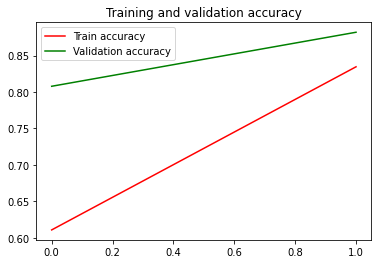

<Figure size 432x288 with 0 Axes>

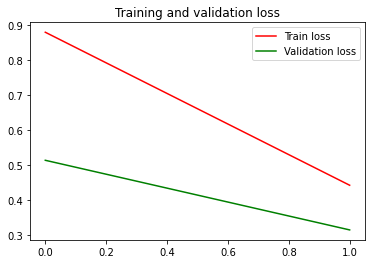

<Figure size 432x288 with 0 Axes>

In [69]:
# Mengambil Nilai Accuracy 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Mengambil Nilai Loss 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot Accruracy
plt.plot(epochs, acc, 'r', label='Train accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# Plot Loss
plt.plot(epochs, loss, 'r', label='Train loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

Upload Foto Test Untuk Hasil Prediksi

Saving paper.jpg to paper.jpg
1/1 [==============================] - 0s 30ms/step


Hasil Prediksi :  [1. 0. 0.] 

Kategori Gambar : Paper


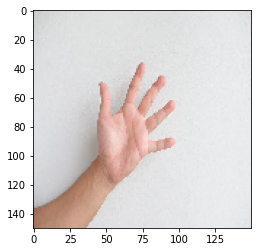

In [99]:
from tensorflow.keras.preprocessing.image import img_to_array

# Upload File ke google colabs
uploaded = files.upload()

# pengkondisian
for file_upload in uploaded.keys():

  path = file_upload
  img = tf.keras.preprocessing.image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  # Membuat numpy vstack array untuk hasil prediksi 
  images = np.vstack([x])
  classes = Model.predict(images, batch_size=16)
  
  print("\n")
  print('Hasil Prediksi : ',classes[0],'\n')

  if classes[0][0] == 1:
    print('Kategori Gambar : Paper')
  elif classes[0][1] == 1:
    print('Kategori Gambar : Rock')
  else:
    print('Kategori Gambar : Scissor')